**STOCK PRICE PREDICTION**

**Prerna Shekhawat - Data Science intern at LetsGrowMore(VIP) September 2023**

## TASK: Stock Market Prediction And Forecasting Using Stacked LSTM

**Importing Dependencies**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader.data import DataReader

from datetime import datetime


**Collecting data from link**

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [60]:
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [61]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


**Exploratory Data Analysis**

In [62]:
#shape of data
df.shape

(2035, 8)

In [63]:
#basic information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [64]:
# statistical analysis of data
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [65]:
#checking number of null values
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

**No null values present in data**

In [66]:
#Formatting date
df['Date'] = pd.to_datetime(df.Date,dayfirst=True)
df.set_index("Date", inplace=True)

In [67]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [68]:
df.rename(columns={'Total Trade Quantity':'Volume'},inplace=True)

In [69]:
df.head(10)

,Open,High,Low,Last,Close,Volume,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41


In [70]:
#Convert time series to specified frequency

#Returns the original data confirmed to new index with the specifies frequency
df = df.asfreq("d")
df = df.fillna(method='bfill')

Text(0, 0.5, 'Open Price')

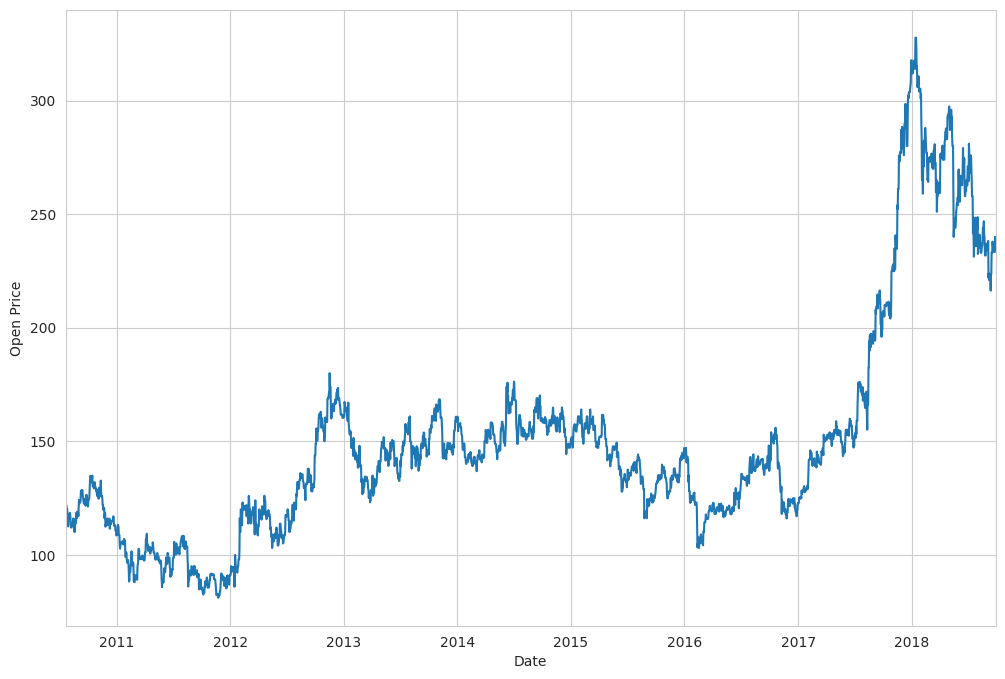

In [71]:
#Plotting Open Prices
df['Open'].plot(figsize=(12,8))
plt.ylabel("Open Price")

Text(0, 0.5, 'Volume Price')

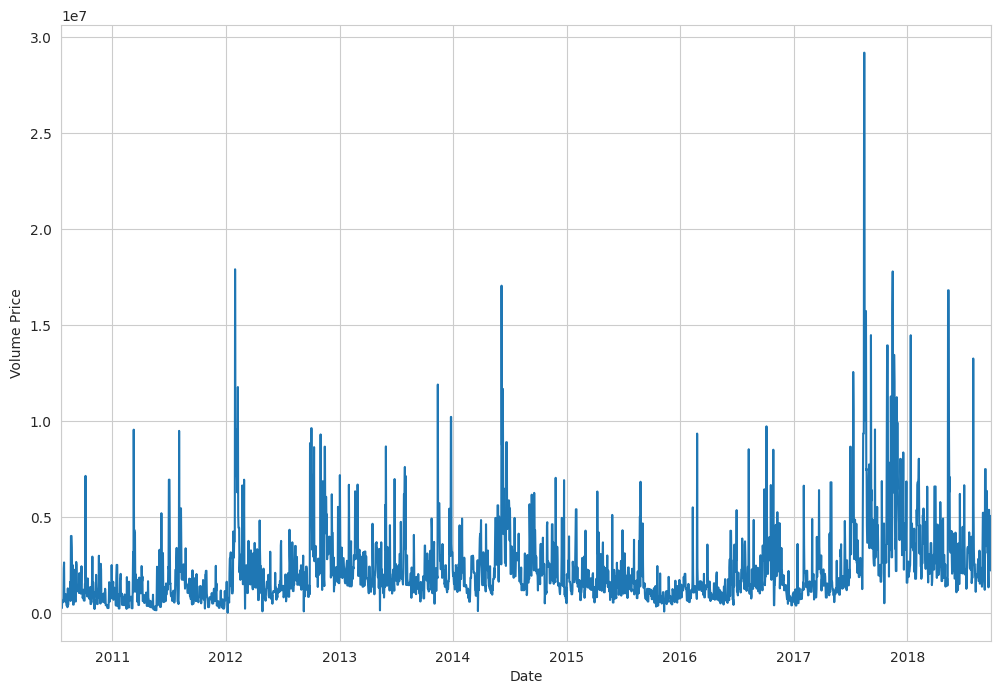

In [72]:
#Plotting volume
df['Volume'].plot(figsize=(12,8))
plt.ylabel("Volume Price")

Text(0.5, 1.0, 'Turnover in Lacs')

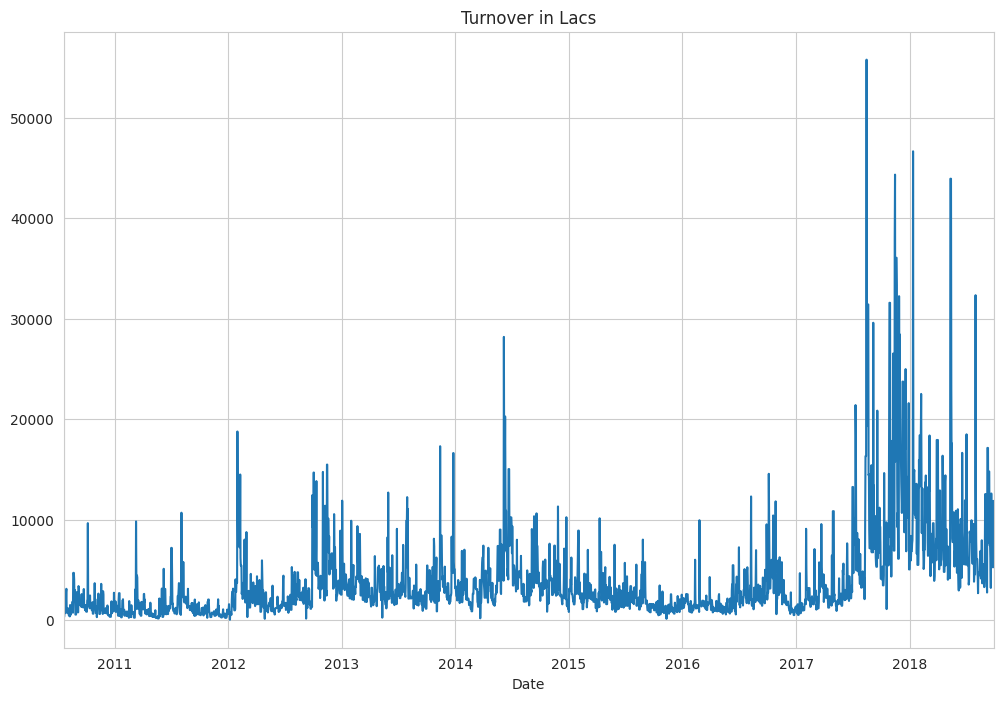

In [73]:
#plotting turnover in lacs
df['Turnover (Lacs)'].plot(figsize=(12,8))
plt.title('Turnover in Lacs')

In [74]:
#Creating new columns 'Daily Return'
df['Daily Return'] = df['Turnover (Lacs)'].pct_change(1)

In [75]:
#Mean of Daily Return
df['Daily Return'].mean()

0.17154859742774714

In [76]:
SR = df['Daily Return'].mean()/df['Daily Return'].std()

<Axes: ylabel='Density'>

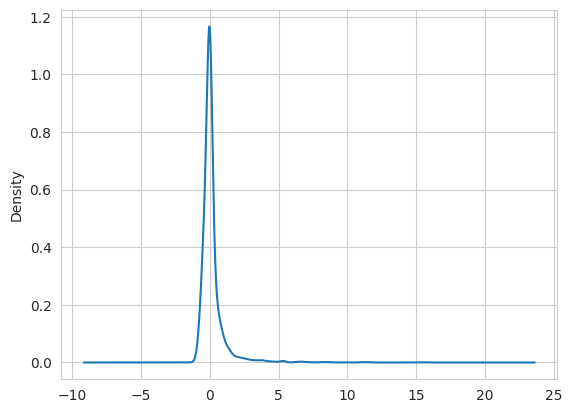

In [77]:
df['Daily Return'].plot(kind='kde')

<Axes: xlabel='Date'>

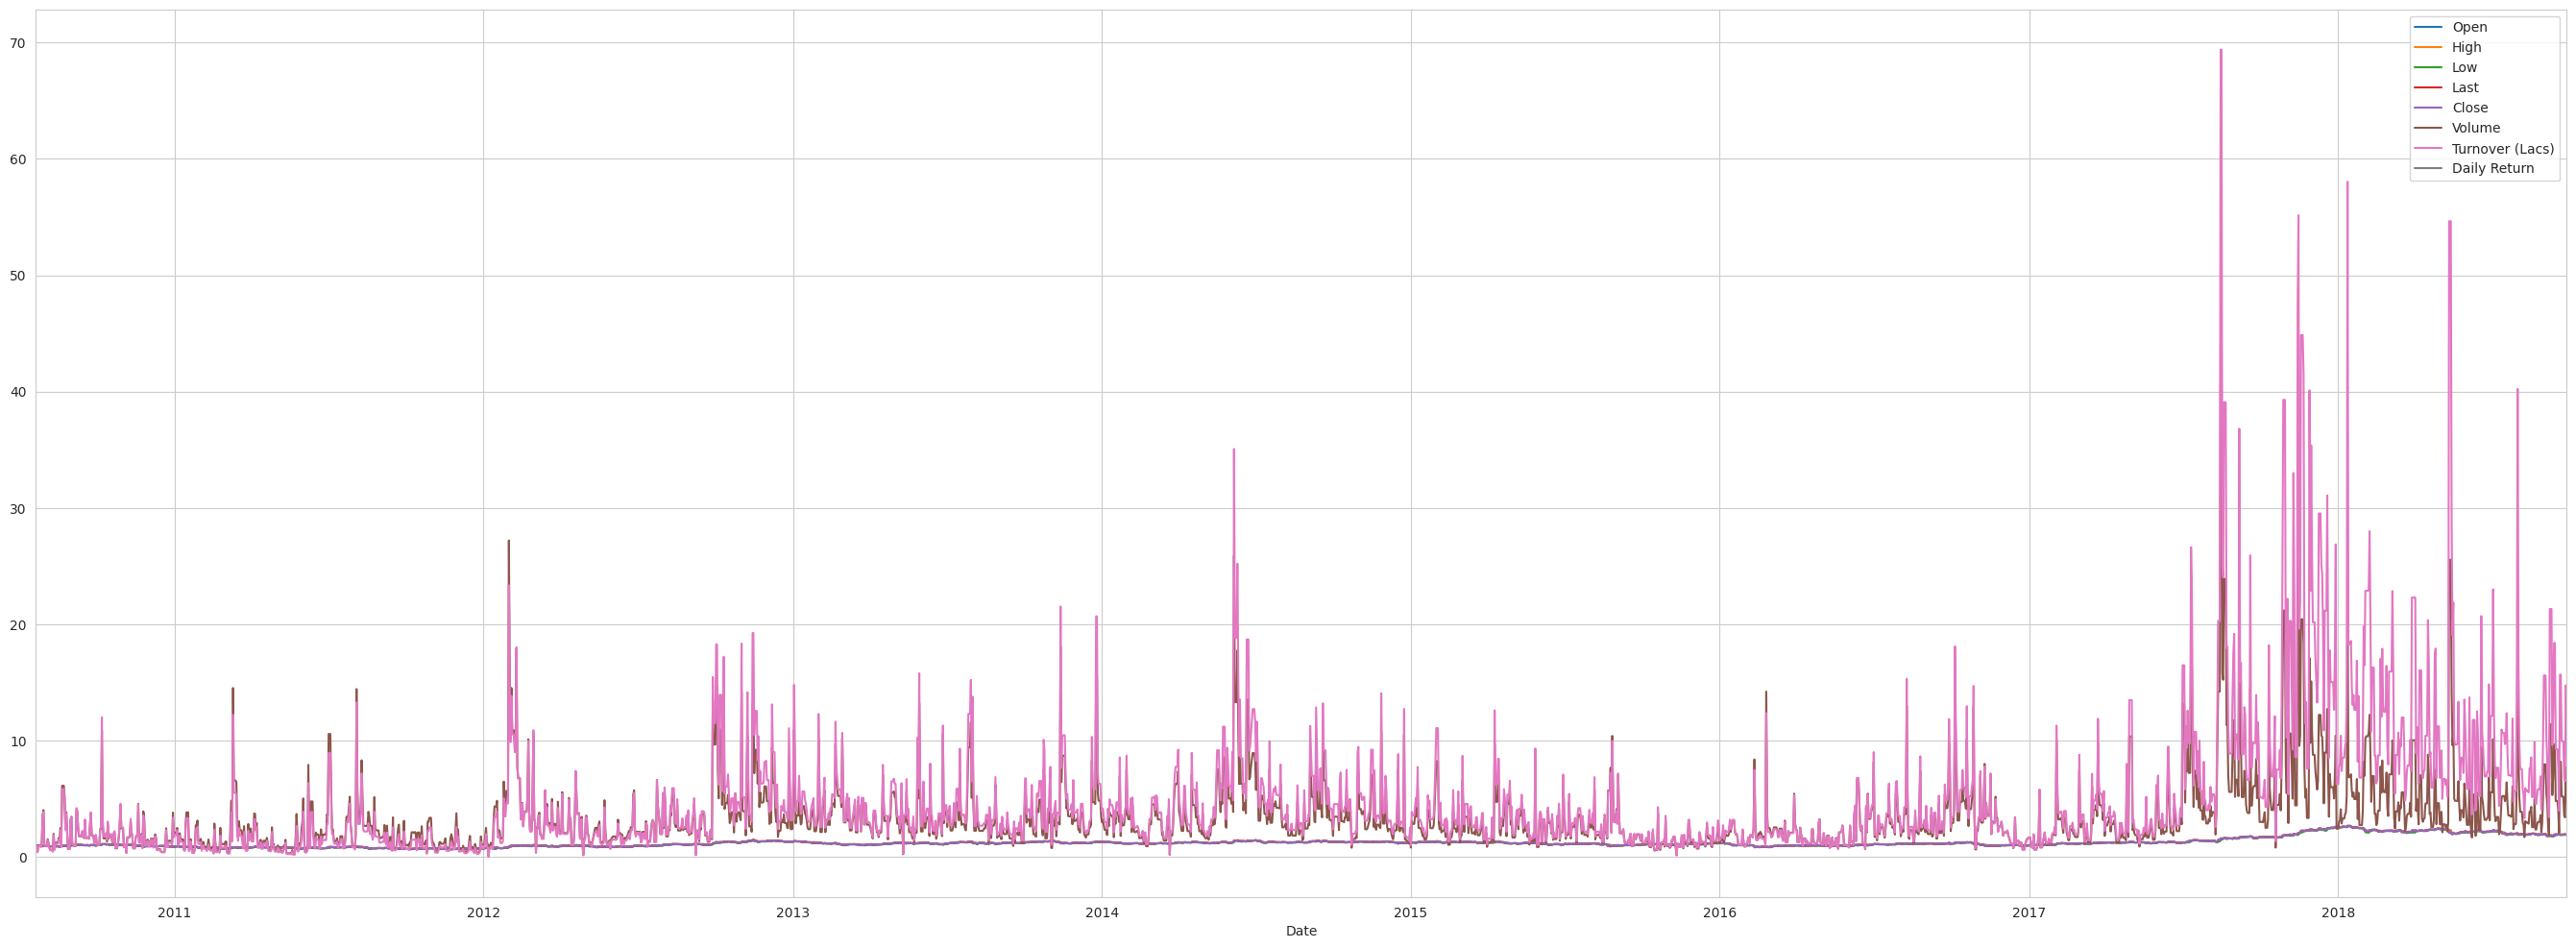

In [78]:
#plotting everything
all_plot = df/df.iloc[0]
all_plot.plot(figsize=(34,12))

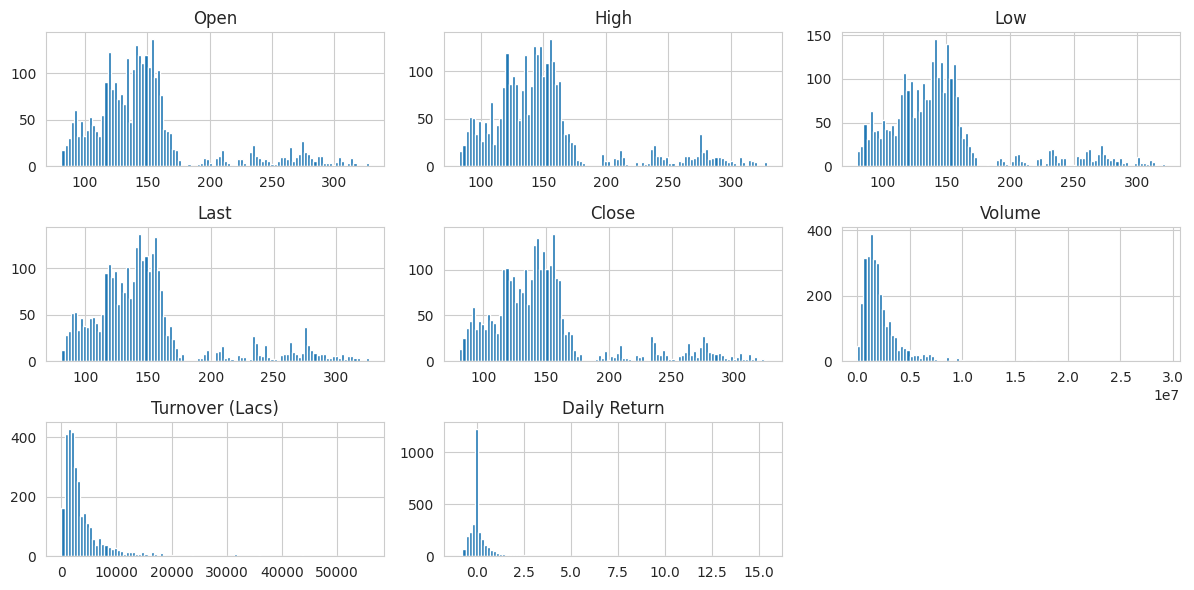

In [79]:
df.hist(bins=100, figsize=(12,6))
plt.tight_layout()

In [80]:
df.resample(rule='A').mean()

,Open,High,Low,Last,Close,Volume,Turnover (Lacs),Daily Return
Date,,,,,,,,
2010-12-31,120.939329,122.346646,118.601524,120.252134,120.207012,1.154934e+06,1402.119451,0.206162
2011-12-31,95.471233,97.115616,93.640822,95.192740,95.179863,1.212957e+06,1181.406301,0.233375
2012-12-31,127.971858,130.267213,125.606694,127.771311,127.686475,2.461222e+06,3291.820656,0.246039
2013-12-31,146.456575,148.655753,143.882740,146.171644,146.108904,2.394176e+06,3520.058877,0.151370
2014-12-31,154.245479,156.294795,152.229452,153.963973,153.985479,2.593240e+06,4070.890932,0.127448
2015-12-31,141.318356,143.122603,139.264932,141.016986,141.076164,1.557560e+06,2223.422877,0.154880
2016-12-31,127.978005,129.762842,126.102596,127.663115,127.666940,1.744988e+06,2281.197459,0.142240
2017-12-31,181.826986,184.925342,179.349315,182.198493,182.196986,3.673597e+06,7484.864548,0.164127
2018-12-31,266.087823,270.543911,261.596494,266.066052,265.938745,3.436876e+06,9134.242620,0.125457


<Axes: title={'center': 'Yearly Mean Closing Price'}, xlabel='Date'>

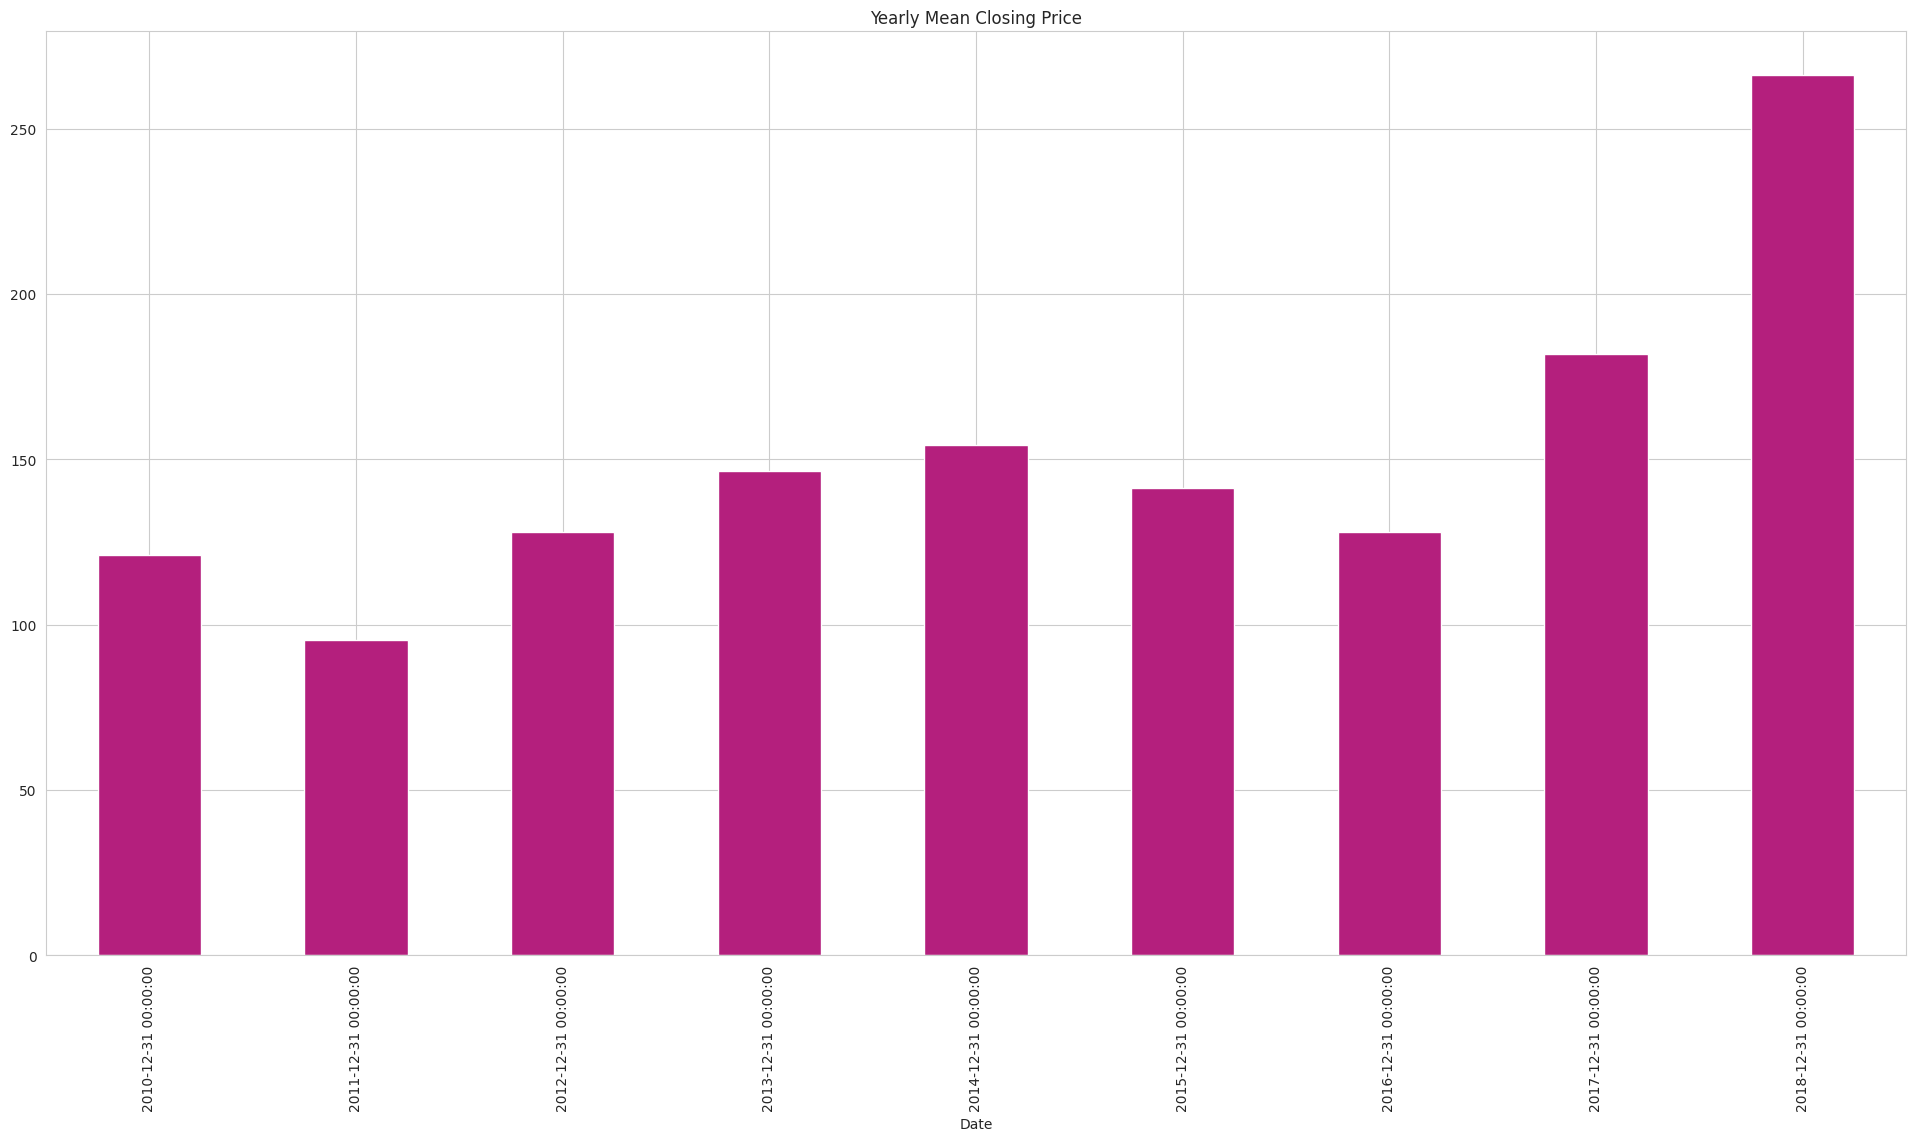

In [81]:
title = 'Yearly Mean Closing Price'
df['Open'].resample('A').mean().plot.bar(title=title,color=['#b41f7d'],figsize=(24,12) )


**Analysis of stock on basis of MOVING AVERAGES**

In [82]:
df['6-month-SMA'] = df['Open'].rolling(window=6).mean()
df['12-month-SMA'] = df['Open'].rolling(window=12).mean()
df['2-month-SMA'] = df['Open'].rolling(window=2).mean()


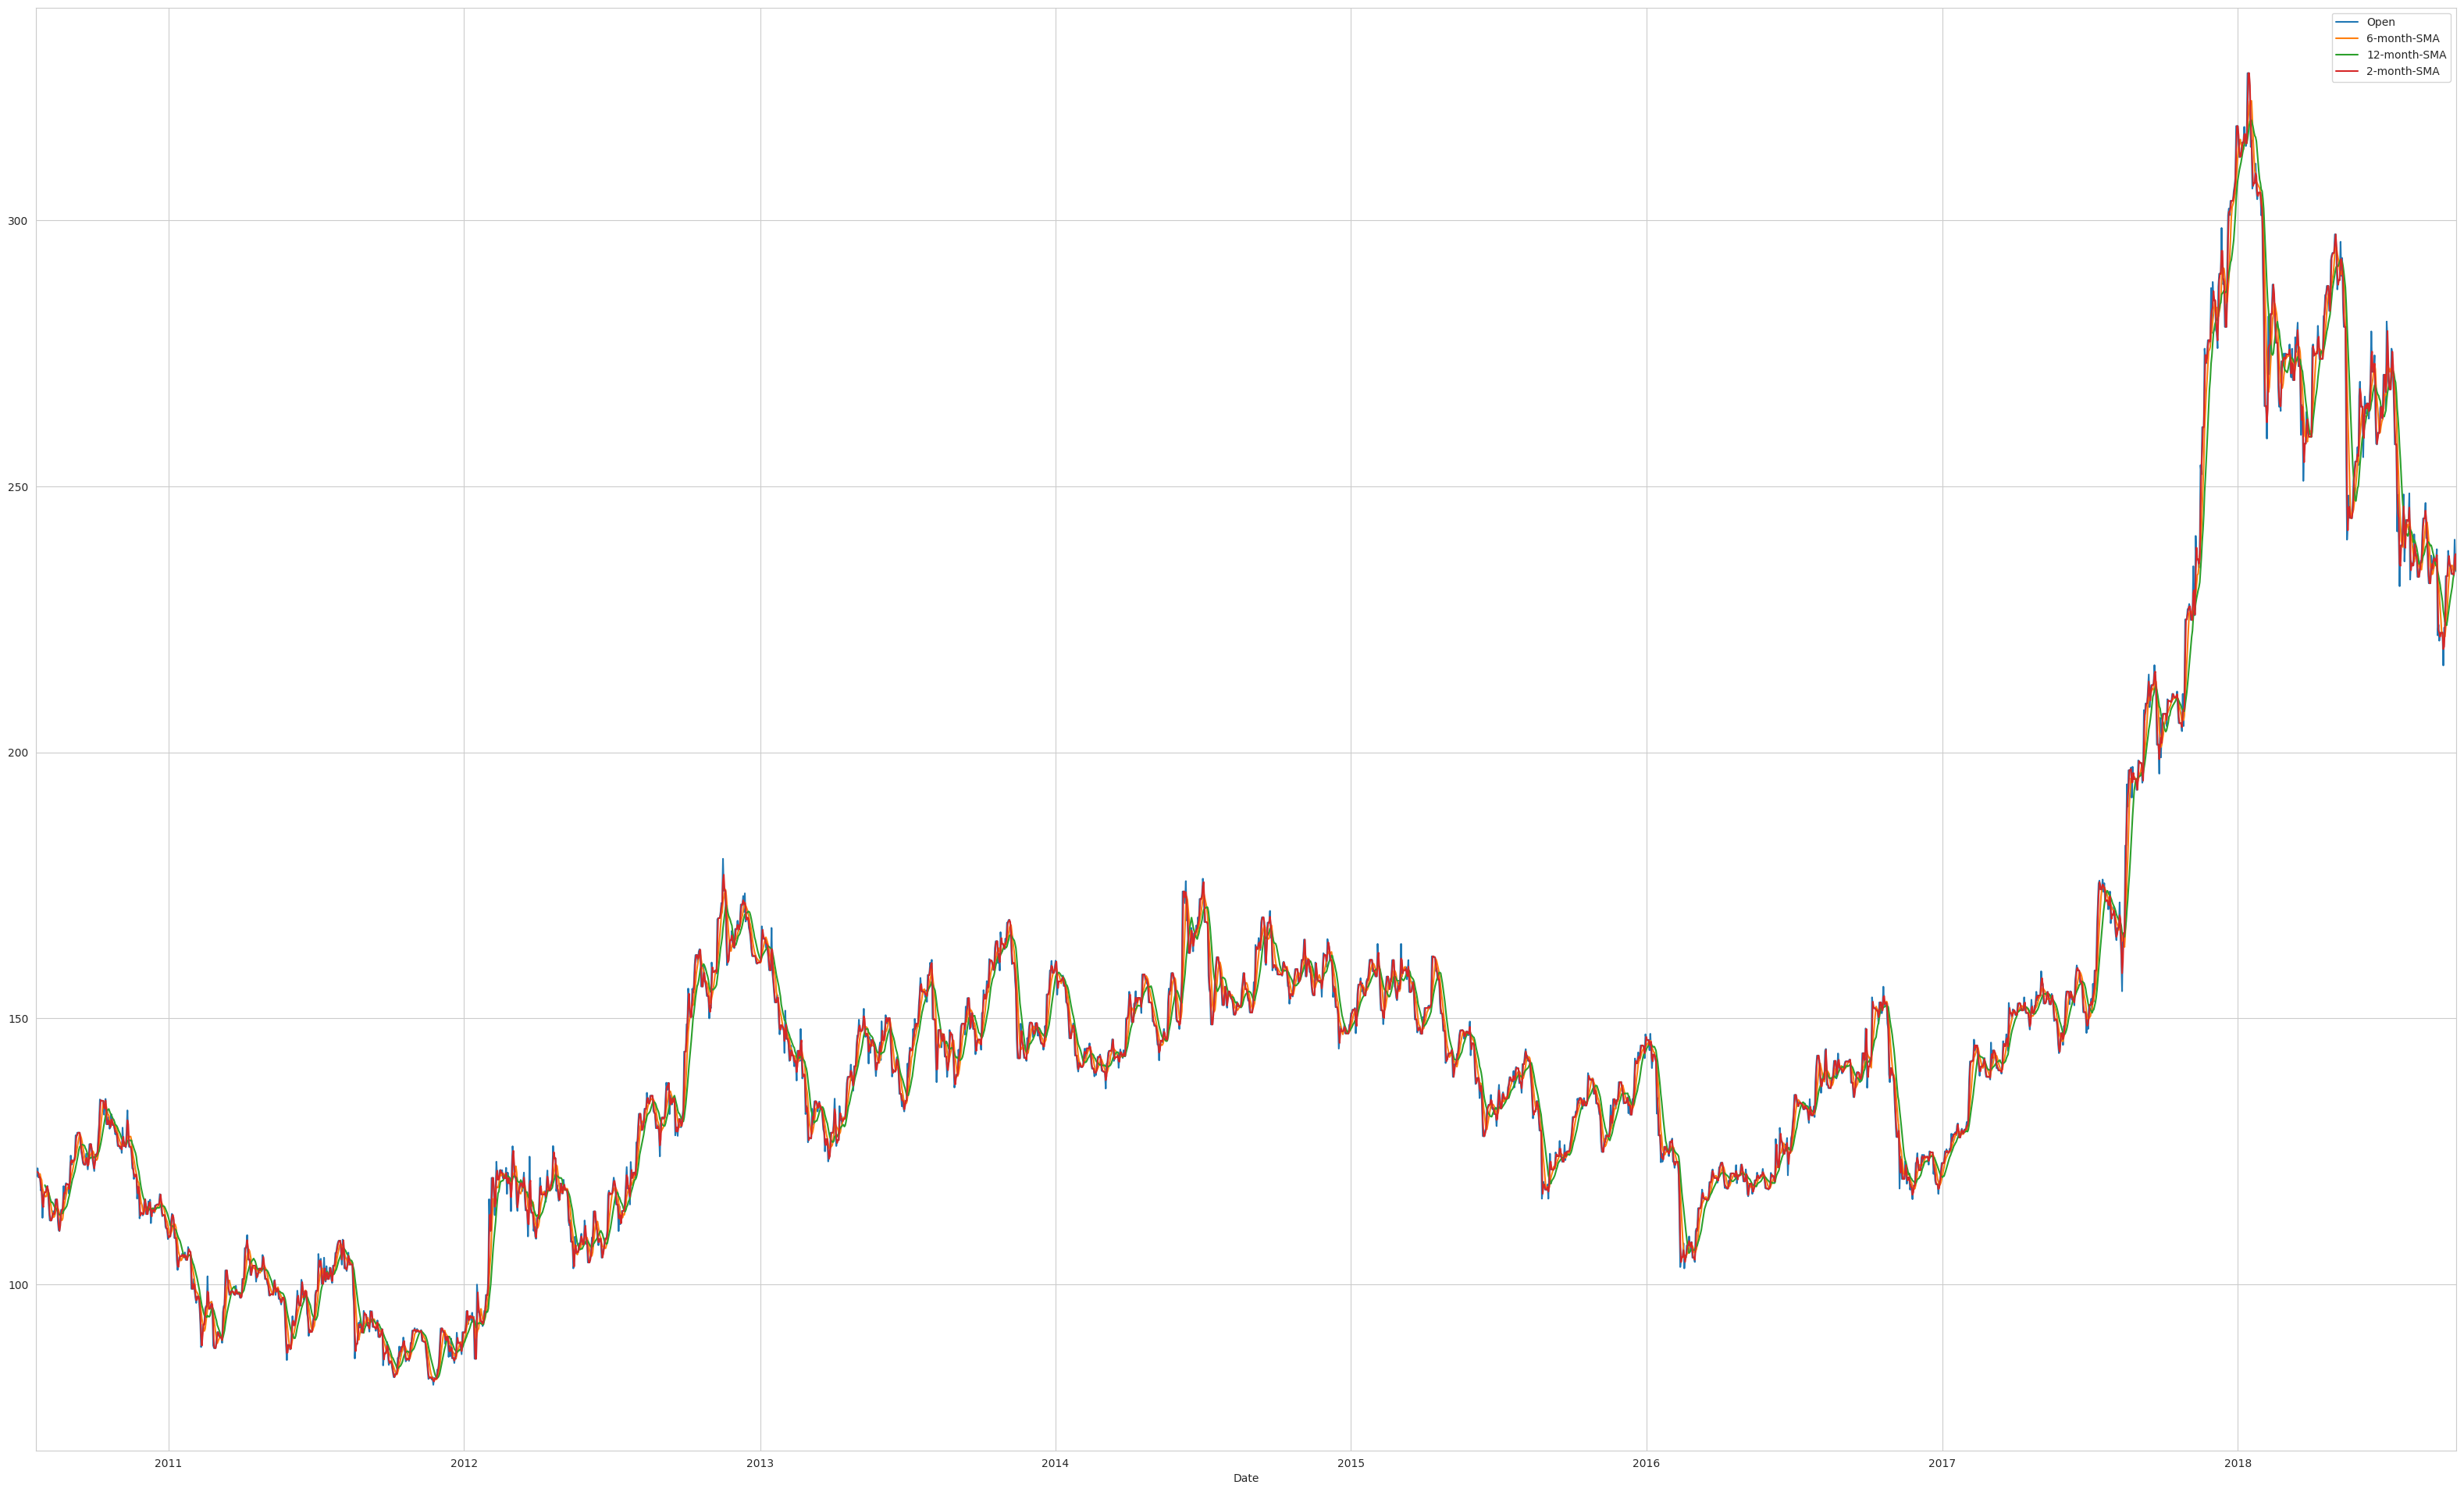

In [83]:
df[["Open","6-month-SMA","12-month-SMA","2-month-SMA"]].plot(figsize=(40,24));

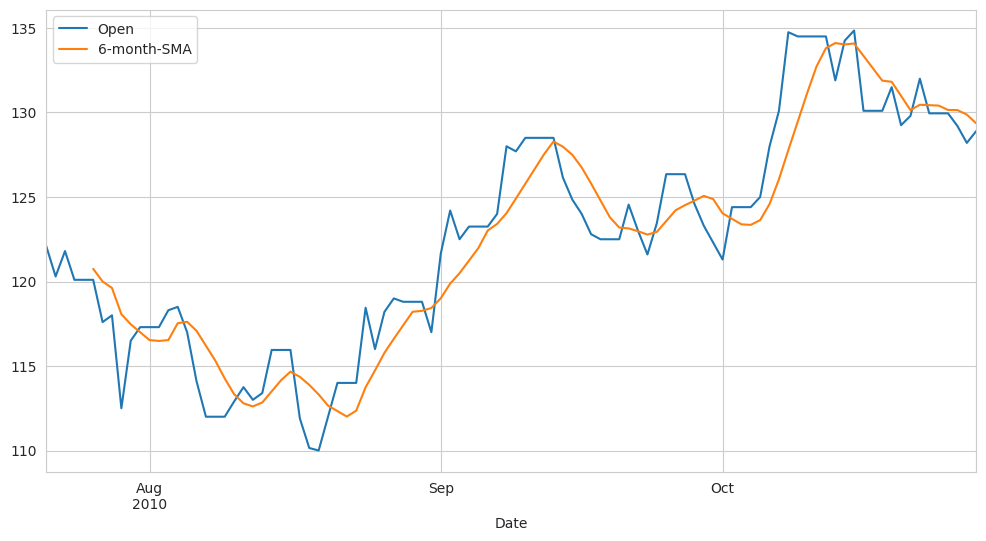

In [84]:
# Opening price and 6 months moving averages on the basis of last 100 records
df[['Open','6-month-SMA']].iloc[:100].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

**Removing Moving Average related Columns**

In [85]:
df.isnull().sum()

Open                0
High                0
Low                 0
Last                0
Close               0
Volume              0
Turnover (Lacs)     0
Daily Return        1
6-month-SMA         5
12-month-SMA       11
2-month-SMA         1
dtype: int64

In [86]:
df.drop(['Daily Return', '6-month-SMA','12-month-SMA','2-month-SMA'], axis=1)

,Open,High,Low,Last,Close,Volume,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-24,120.10,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-25,120.10,121.00,117.10,117.10,117.60,658440.0,780.01
...,...,...,...,...,...,...,...
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60


**Data Scaling**

In [87]:
df.head(10)

,Open,High,Low,Last,Close,Volume,Turnover (Lacs),Daily Return,6-month-SMA,12-month-SMA,2-month-SMA
Date,,,,,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56,NaN,NaN,NaN,NaN
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17,-0.558004,NaN,NaN,121.20
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31,-0.041839,NaN,NaN,121.05
2010-07-24,120.1,121.00,117.10,117.10,117.60,658440.0,780.01,1.292057,NaN,NaN,120.95
2010-07-25,120.1,121.00,117.10,117.10,117.60,658440.0,780.01,0.000000,NaN,NaN,120.10
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01,0.000000,120.750000,NaN,120.10
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98,-0.109011,120.000000,NaN,118.85
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01,0.430271,119.616667,NaN,117.80
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03,1.807849,118.066667,NaN,115.25


**LSTM**

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

**Splitting data into training data by 'Open'**

In [89]:
data = df.filter(['Open'])

dataset = data.values

training_data_len = int(np.ceil(len(dataset) * .95 ))

training_data_len

2843

**MinMax Scaler**

In [90]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.16626115],
       [0.15896188],
       [0.16504461],
       ...,
       [0.64436334],
       [0.62226277],
       [0.6202352 ]])

In [91]:
scaled_data.shape

(2992, 1)

In [92]:
#Training data into X_train and Y_train
train_data = scaled_data[0:int(training_data_len)]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

x_train, y_train = np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

[array([0.16626115, 0.15896188, 0.16504461, 0.15815085, 0.15815085,
       0.15815085, 0.14801298, 0.14963504, 0.12733171, 0.14355231,
       0.14679643, 0.14679643, 0.14679643, 0.15085158, 0.15166261,
       0.14557989, 0.13381995, 0.12530414, 0.12530414, 0.12530414,
       0.12895377, 0.13240065, 0.12935929, 0.13098135, 0.14132198,
       0.14132198, 0.14132198, 0.12489862, 0.11780211, 0.11719384,
       0.12530414, 0.13341444, 0.13341444, 0.13341444, 0.15145985,
       0.14152474, 0.15044607, 0.15369019, 0.15287916, 0.15287916,
       0.15287916, 0.14557989, 0.16443633, 0.17477697, 0.16788321,
       0.17092457, 0.17092457, 0.17092457, 0.17396594, 0.19018654,
       0.18896999, 0.19221411, 0.19221411, 0.19221411, 0.19221411,
       0.18268451, 0.17741281, 0.17396594, 0.16909976, 0.16788321])]
[0.16788321167883213]

[array([0.16626115, 0.15896188, 0.16504461, 0.15815085, 0.15815085,
       0.15815085, 0.14801298, 0.14963504, 0.12733171, 0.14355231,
       0.14679643, 0.14679643, 0.14

**Training LSTM model**

In [93]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 29857 (116.63 KB)
Trainable params: 29857 (116.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
callbacks = EarlyStopping(patience=3, monitor='val_loss', mode='min',verbose=1)

In [96]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, callbacks=[callbacks])

Epoch 1/20
22/22 [==============================] - ETA: 0s - loss: 0.0126

22/22 [==============================] - 7s 117ms/step - loss: 0.0126
Epoch 2/20
22/22 [==============================] - ETA: 0s - loss: 9.4782e-04

22/22 [==============================] - 4s 180ms/step - loss: 9.4782e-04
Epoch 3/20
22/22 [==============================] - ETA: 0s - loss: 6.3167e-04

22/22 [==============================] - 3s 116ms/step - loss: 6.3167e-04
Epoch 4/20
22/22 [==============================] - ETA: 0s - loss: 5.4280e-04

22/22 [==============================] - 3s 114ms/step - loss: 5.4280e-04
Epoch 5/20
22/22 [==============================] - ETA: 0s - loss: 5.3396e-04

22/22 [==============================] - 3s 117ms/step - loss: 5.3396e-04
Epoch 6/20
22/22 [==============================] - ETA: 0s - loss: 5.2039e-04

22/22 [==============================] - 3s 139ms/step - loss: 5.2039e-04
Epoch 7/20
22/22 [==============================] - ETA: 0s - loss: 5.1975e-04

22/22 [==============================] - 3s 153ms/step - loss: 5.1975e-04
Epoch 8/20
22/22 [==============================] - ETA: 0s - loss: 5.0434e-04

22/22 [==============================] - 3s 115ms/step - loss: 5.0434e-04
Epoch 9/20
22/22 [==============================] - ETA: 0s - loss: 4.9043e-04

22/22 [==============================] - 3s 116ms/step - loss: 4.9043e-04
Epoch 10/20
22/22 [==============================] - ETA: 0s - loss: 4.8942e-04

22/22 [==============================] - 3s 118ms/step - loss: 4.8942e-04
Epoch 11/20
22/22 [==============================] - ETA: 0s - loss: 4.7193e-04

22/22 [==============================] - 4s 183ms/step - loss: 4.7193e-04
Epoch 12/20
22/22 [==============================] - ETA: 0s - loss: 4.6531e-04

22/22 [==============================] - 3s 118ms/step - loss: 4.6531e-04
Epoch 13/20
22/22 [==============================] - ETA: 0s - loss: 4.5548e-04

22/22 [==============================] - 3s 115ms/step - loss: 4.5548e-04
Epoch 14/20
22/22 [==============================] - ETA: 0s - loss: 4.3001e-04

22/22 [==============================] - 3s 114ms/step - loss: 4.3001e-04
Epoch 15/20
22/22 [==============================] - ETA: 0s - loss: 4.7225e-04

22/22 [==============================] - 3s 129ms/step - loss: 4.7225e-04
Epoch 16/20
22/22 [==============================] - ETA: 0s - loss: 4.3139e-04

22/22 [==============================] - 5s 215ms/step - loss: 4.3139e-04
Epoch 17/20
22/22 [==============================] - ETA: 0s - loss: 4.2336e-04

22/22 [==============================] - 3s 116ms/step - loss: 4.2336e-04
Epoch 18/20
22/22 [==============================] - ETA: 0s - loss: 4.1425e-04

22/22 [==============================] - 3s 116ms/step - loss: 4.1425e-04
Epoch 19/20
22/22 [==============================] - ETA: 0s - loss: 4.0897e-04

22/22 [==============================] - 3s 114ms/step - loss: 4.0897e-04
Epoch 20/20
22/22 [==============================] - ETA: 0s - loss: 3.9087e-04

22/22 [==============================] - 4s 179ms/step - loss: 3.9087e-04


In [97]:
# test_data
from sklearn.metrics import mean_absolute_error
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)
print(mean_absolute_error(y_test, predictions))

5/5 [==============================] - 1s 18ms/step
9.252742277254974
6.74199919220585


<ipython-input-98-24787ebc2cf0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


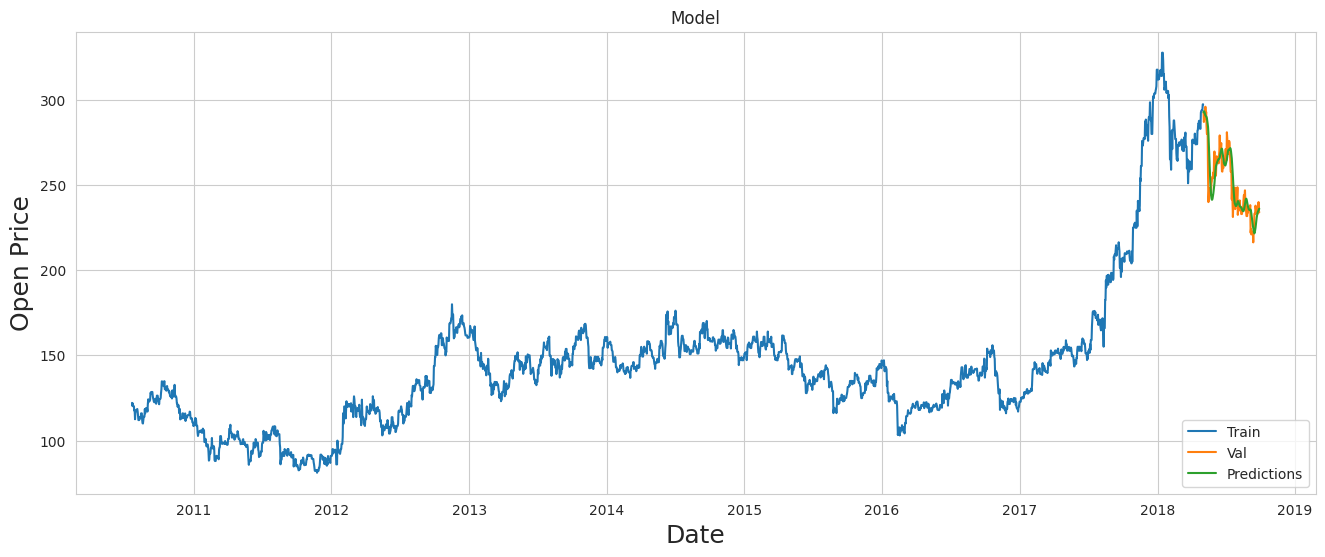

In [98]:
# Plot the data
# train vs validation
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

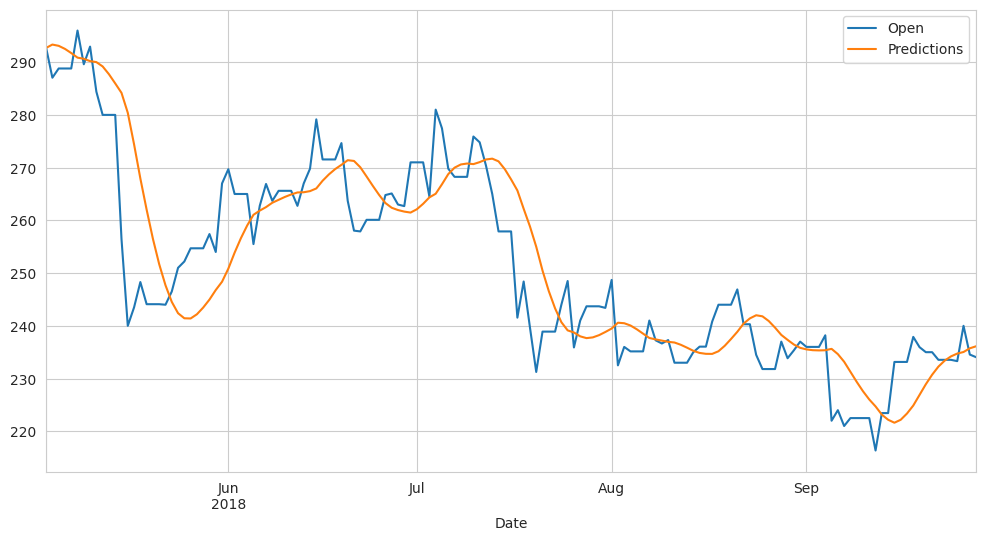

In [99]:
valid[['Open','Predictions']].iloc[:250].plot(figsize=(12,6)).autoscale(axis='x',tight=True);